# ZTF-TESS Plotting

In [1]:
import os

import matplotlib.pyplot as plt

from plotting import ztf_plot

parameters = {
        "norm": False,
        "to_bin": True,
        "bin_interval": "0.5D",
        "time_scale": "trigger",
        "convert_to_mag": False,
        "sub_bg_model": False,
        "remove_extinction": True,
        "median_filter": True,
        "window_size": "2.5D"
    }
ztf_data = os.listdir("TESS_data/ztf_data/")

,r_flux,r_uncert,g_flux,g_uncert,tess_flux,tess_uncert
relative_time,,,,,,
-30.0,3.523636,24.955706,16.782426,21.904605,NaN,NaN
-29.5,NaN,NaN,NaN,NaN,NaN,NaN
-29.0,25.866134,59.904686,8.241734,28.682674,NaN,NaN
-28.5,NaN,NaN,NaN,NaN,NaN,NaN
-28.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
68.0,NaN,NaN,NaN,NaN,NaN,NaN
68.5,NaN,NaN,NaN,NaN,NaN,NaN
69.0,NaN,NaN,NaN,NaN,NaN,NaN


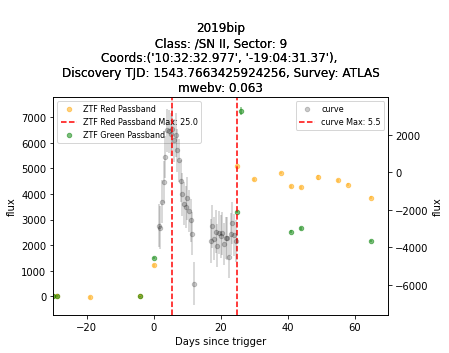

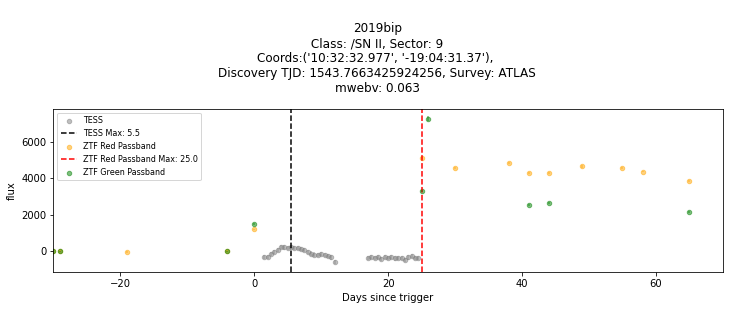

In [2]:
from plotting import display_curve, tess_plot
from preprocess import preprocess_ztf
import matplotlib.pyplot as plt


#2018ijn
test = ztf_data[1]
test = "2019bip_ZTF19aallimd_exitcode56.csv"
xlim = [-30, 70]
fig, ax = plt.subplots()
light_unit = "flux" if not parameters["convert_to_mag"] else "mag"
tess_name = test.split("_")[0]
df, meta = preprocess_ztf(test, parameters)
ax = display_curve(df, meta, f"r_{light_unit}", "r_uncert",  color="orange", label="ZTF Red Passband", max_color="red", is_mag=parameters["convert_to_mag"], ax=ax)
ax = display_curve(df, meta, f"g_{light_unit}", "g_uncert", color="green", label="ZTF Green Passband", ax=ax, max_line=False, is_mag=parameters["convert_to_mag"])

if parameters["convert_to_mag"]:
    ax.invert_yaxis()
ax_right = ax.twinx()
tess_ax, df = tess_plot(tess_name, parameters, xlim=xlim, ax=ax_right, unbinned=False)
# plt.savefig(f"./TESS_data/test/{test}.png")
# plt.close(fig)
ztf_plot(test, parameters)

In [3]:
from preprocess import preprocess_ztf_tess
df, _ = preprocess_ztf_tess(test, parameters)
df

,r_flux,r_uncert,g_flux,g_uncert,tess_flux,tess_uncert
relative_time,,,,,,
-111.5,-141.893175,102.713244,NaN,NaN,NaN,NaN
-111.0,NaN,NaN,NaN,NaN,NaN,NaN
-110.5,NaN,NaN,NaN,NaN,NaN,NaN
-110.0,NaN,NaN,NaN,NaN,NaN,NaN
-109.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
72.0,NaN,NaN,NaN,NaN,NaN,NaN
72.5,NaN,NaN,NaN,NaN,NaN,NaN
73.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for file in ztf_data:
    name = file.split(".")[0]
    print(name)
    ztf_plot(file, parameters, save=True, save_name=name)

2018fzi_ZTF18abtkqkb_exitcode62
0.29469686159624375
0.29469686159624375
2018grv_ZTF18abwerpm_exitcode62
2018gxi_ZTF18abzscns_exitcode62
0.12797749040823786
0.12797749040823786
2018hgl_ZTF18acbxshd_exitcode62
2018hka_ZTF18acbudzh_exitcode62
2018hkb_ZTF18acbudzo_exitcode62
0.13706750541846754
0.13706750541846754
2018hxq_ZTF18abyiusv_exitcode62
0.2970354596603062
0.2970354596603062
2018hyy_ZTF18acckoil_exitcode62
0.09144261540577975
0.09144261540577975
2018ijn_ZTF18acfvhko_exitcode62
2018ime_ZTF18achoord_exitcode62
0.12569338949989806
0.12569338949989806
2018iti_ZTF18achqdch_exitcode62
0.12642155620278875
0.12642155620278875
2018itr_ZTF18acmyxfx_exitcode62
0.15807586698559858
0.15807586698559858
2018iwg_ZTF18abwbcjx_exitcode62
0.08746626117677357
0.08746626117677357
2018iyh_ZTF18acmwyya_exitcode62
0.11878063525425626
0.11878063525425626
2018iyx_ZTF18acptgzz_exitcode62
0.22417019524617465
0.22417019524617465
2018izg_ZTF18acrcshq_exitcode62
0.21423681328549585
0.21423681328549585
2018jeb_ZT

# TESS-Plotting

In [3]:
import os
from plotting import tess_plot
import warnings


light_curves = os.listdir("./TESS_data/ztf_data")
save_dir="./TESS_data/tess_unprocessed_plots/all/"
xlim = [-30,30]
parameterss = {
        "norm": False,
        "to_bin": False,
        "bin_interval": "0.5D",
        "time_scale": "trigger",
        "sub_bg_model": False,
        "convert_to_mag": False,
        "remove_extinction": True,
        "median_filter": True,
        "window_size": "2.5D"
    }

def save_all(curves):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        for curve_name in curves:
            tess_name = curve_name.split("_")[0]
            print(tess_name)
            tess_plot(tess_name, parameters, save=True, save_dir=save_dir)

## save tess plots of all curves with ztf data

In [10]:
save_all(light_curves)

2018fzi
2018grv
2018gxi
2018hgl
2018hka
2018hkb
2018hxq
2018hyy
2018ijn
2018ime
2018iti
2018itr
2018iwg
2018iyh
2018iyx
2018izg
2018jeb
2018jjs
2018jnd
2018jwh
2018kfv
2018koy
2018ksr
2018kvc
2018kwm
2018lit
2018lot
2019aba
2019aeu
2019axj
2019bip
2019bop
2019bwo
2019bwu
2019bxi
2019cxt
2019dhz
2019dke
2019dsn
2019fp
2019mdw
2019nnr
2019nvk
2019nvl
2019nzq
2019onn
2019ook
2019opz
2019osp
2019pac
2019pny
2019prm
2019prs
2019ptf
2019pzj
2019qhh
2019qmt
2019qqr
2019rdl
2019rj
2019rrc
2019ruc
2019ruf
2019rvx
2019slt
2019soh
2019sql
2019str
2019sts
2019swy
2019sxc
2019sxe
2019tfa
2019tfd
2019tjz
2019tta
2019ubi
2019udn
2019uen
2019ufy
2019uge
2019ugr
2019uje
2019ujq
2019ujw
2019ulr
2019ulw
2019uwj
2019uyn
2019vli
2019vlu
2019vyj
2019wjl
2019wkz
2019wla
2019wle
2019wz
2019xaq
2019xar
2019xcn
2019xul
2019zam
2019zes
2019zsi
2020aajf
2020aalz
2020aan
2020aarw
2020aatb
2020aauh
2020aawh
2020aawi
2020abqy
2020abq
2020abrp
2020abtd
2020abvc
2020abwb
2020abxl
2020acbc
2020acbf
2020accz
2020acdk
20

## save all curves with desired labels

In [15]:
import shutil
import pandas as pd

def remove_dir_files(dir):
    for f in os.listdir(dir):
        os.remove(os.path.join(dir, f))

labels = pd.read_csv("./TESS_data/curve_labels.csv")
tess_dir = f"./TESS_data/tess_unprocessed_plots/"
good_dir = tess_dir + "good"
maybe_dir = tess_dir + "maybe"
great_dir = tess_dir + "great"

remove_dir_files(good_dir)
remove_dir_files(maybe_dir)
remove_dir_files(great_dir)


good_labels = labels[(labels["tess_good"] == True)]["curve_name"]
maybe_labels = labels[(labels["tess_maybe"] == True)]["curve_name"]
great_labels = labels[(labels["tess_great"] == True)]["curve_name"]

for file in maybe_labels:
    shutil.copy(f"{tess_dir}/all/{file}.png", maybe_dir)

for file in good_labels:
    shutil.copy(f"{tess_dir}all/{file}.png", good_dir)

for file in great_labels:
    shutil.copy(f"{tess_dir}all/{file}.png", great_dir)